# analyze the geography of the campgrounds

In [1]:
import pandas as pd
import analyze_campgrounds as ac

In [2]:
df = pd.read_csv('./scraped_campgrounds.csv')
slc = df[df['Forest'] == 'Sierra National Forest ']

In [3]:
result = ac.group_points(slc, n_iters=10)

/Users/Onur/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Onur/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
df.groupby('Forest').apply(ac.group_points, n_iters=1)

,Campground,Status,Fees,Open Season,Reservations,Restroom,Potable Water,Elevation,Latitude,Longitude,Usage,Water,URL,Forest,Geo Group
0,Chilkoot Campground,Open,$23.62,May - September,reservations only,Vault,False,4600.0,37.368460,-119.536662,Heavy,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,2.0
1,Forks Campground,Open,$30.00,May,reservations only,Flush,True,3400.0,37.312454,-119.567827,Light,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,14.0
2,Lupine Cedar Bluff Campground,Open,$30.00,Open all year,reservations only,Flush,True,3400.0,37.307562,-119.544363,Heavy,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,14.0
3,Spring Cove Campground,Open,$30.00,May,reservations only,Flush,True,3400.0,37.301627,-119.542385,Heavy,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,14.0
4,Whiskers Campground,Closed,$23.62,June - September,fcfs,Vault,False,5300.0,37.333849,-119.491499,Light,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,2.0
5,Wishon Point Campground,Open,$30.00,May - September,reservations only,Flush,True,3400.0,37.296901,-119.534974,Light,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,14.0
6,Clover Meadow Campground,Closed,$0,June,fcfs,Vault,True,7000.0,37.528986,-119.280382,Light,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,12.0
7,Fish Creek Campground,Closed,$23.62,June,reservations only,Vault,False,4600.0,37.260081,-119.353211,Light,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,10.0
8,Granite Creek Campground,Open,$0,June - September,fcfs,Vault,False,7000.0,37.538208,-119.264557,Light,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,12.0
9,Little Jackass Campground,Open,$0,June,fcfs,Vault,False,4800.0,37.399759,-119.336157,Light,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,4.0


In [6]:
import pandas as pd
import sys
sys.path.append('/Users/Onur/repos/toolbox/')
import plot_helpers as ph
from sklearn.cluster import KMeans
import geopy.distance
from matplotlib import pyplot as plt
import random
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('./scraped_campgrounds.csv')

In [99]:
slc = df[df['Forest'] == 'Sierra National Forest ']
clean = slc[['Latitude', 'Longitude']].dropna()
X = clean.values

In [74]:
# set lower and upper bounds for number of clusters k
# want fewer than ~20 points in a cluster
lower_k = len(X) // 20
# want more than ~2 points in a cluster
upper_k = len(X) // 2

print lower_k, upper_k

2 27


In [85]:
kmeans_data = []
r = range(lower_k,upper_k)
for k in r:
    clst = KMeans(k, n_jobs=-1, n_init=250).fit(X)
    kmeans_data.append(clst)

In [104]:
kmeans_data[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=250, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [86]:
all_mean_ssd = []
all_mean_distances = []
for clst in kmeans_data:
    ssd_collect = []
    mean_distance_collect = []
    for i, centroid in enumerate(clst.cluster_centers_):
        points = pd.np.argwhere(clst.labels_ == i).flatten()
        ssd = 0
        distances = 0
        for idx in points:
            p = X[idx]
            dist = geopy.distance.vincenty(centroid, p).km
            distances += dist
            sd = dist ** 2
            ssd += sd
        # this is kind of like a rough "radius" of distance around the centroid
        mean_distance = distances / len(points)
        mean_distance_collect.append(mean_distance)
        ssd_collect.append(ssd)
    mean_mean_distance = pd.np.asarray(mean_distance_collect).mean()
    all_mean_distances.append(mean_mean_distance)
    mean_ssd = pd.np.asarray(ssd_collect).mean()
    all_mean_ssd.append(mean_ssd)

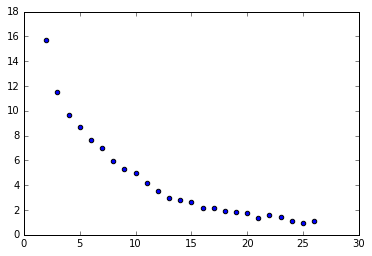

In [87]:
plt.scatter(r, all_mean_distances)

In [88]:
# get the number of clusters to make the mean "radius" of a cluster close to 2.5
# the average longest distance between two points will be 5 km
m = pd.np.asarray(all_mean_distances)
best_k = pd.np.argwhere(m <= 2.5).flatten()[0]
print best_k

14


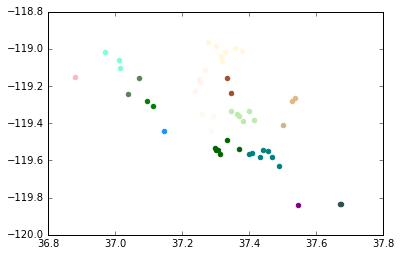

In [89]:
clst = kmeans_data[best_k]
colors = random.sample(matplotlib.colors.cnames.keys(), len(clst.cluster_centers_))
for i, coord in enumerate(X):
    cluster_idx = clst.labels_[i]
    plt.scatter(coord[0], coord[1], color=colors[cluster_idx])
plt.show()

In [100]:
df.loc[clean.index, 'Geo Group'] = clst.labels_

In [103]:
df.loc[clean.index]

,Campground,Status,Fees,Open Season,Reservations,Restroom,Potable Water,Elevation,Latitude,Longitude,Usage,Water,URL,Forest,Geo Group
0,Chilkoot Campground,Open,$23.62,May - September,reservations only,Vault,False,4600.0,37.368460,-119.536662,Heavy,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,10.0
1,Forks Campground,Open,$30.00,May,reservations only,Flush,True,3400.0,37.312454,-119.567827,Light,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,10.0
2,Lupine Cedar Bluff Campground,Open,$30.00,Open all year,reservations only,Flush,True,3400.0,37.307562,-119.544363,Heavy,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,10.0
3,Spring Cove Campground,Open,$30.00,May,reservations only,Flush,True,3400.0,37.301627,-119.542385,Heavy,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,10.0
4,Whiskers Campground,Closed,$23.62,June - September,fcfs,Vault,False,5300.0,37.333849,-119.491499,Light,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,10.0
5,Wishon Point Campground,Open,$30.00,May - September,reservations only,Flush,True,3400.0,37.296901,-119.534974,Light,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,10.0
6,Clover Meadow Campground,Closed,$0,June,fcfs,Vault,True,7000.0,37.528986,-119.280382,Light,Yes,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,9.0
7,Fish Creek Campground,Closed,$23.62,June,reservations only,Vault,False,4600.0,37.260081,-119.353211,Light,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,4.0
8,Granite Creek Campground,Open,$0,June - September,fcfs,Vault,False,7000.0,37.538208,-119.264557,Light,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,9.0
9,Little Jackass Campground,Open,$0,June,fcfs,Vault,False,4800.0,37.399759,-119.336157,Light,No,https://www.fs.usda.gov/recarea/sierra/recreat...,Sierra National Forest,8.0


In [98]:
clst.labels_.shape

(54,)